In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [3]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No nan values.

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


minimum values of the dimensions x,y,z are zero. 

In [8]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].shape

(20, 10)

removing these 20 rows of data seems to be the most viable option.

In [9]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df.shape

(53920, 10)

### Correlation between features

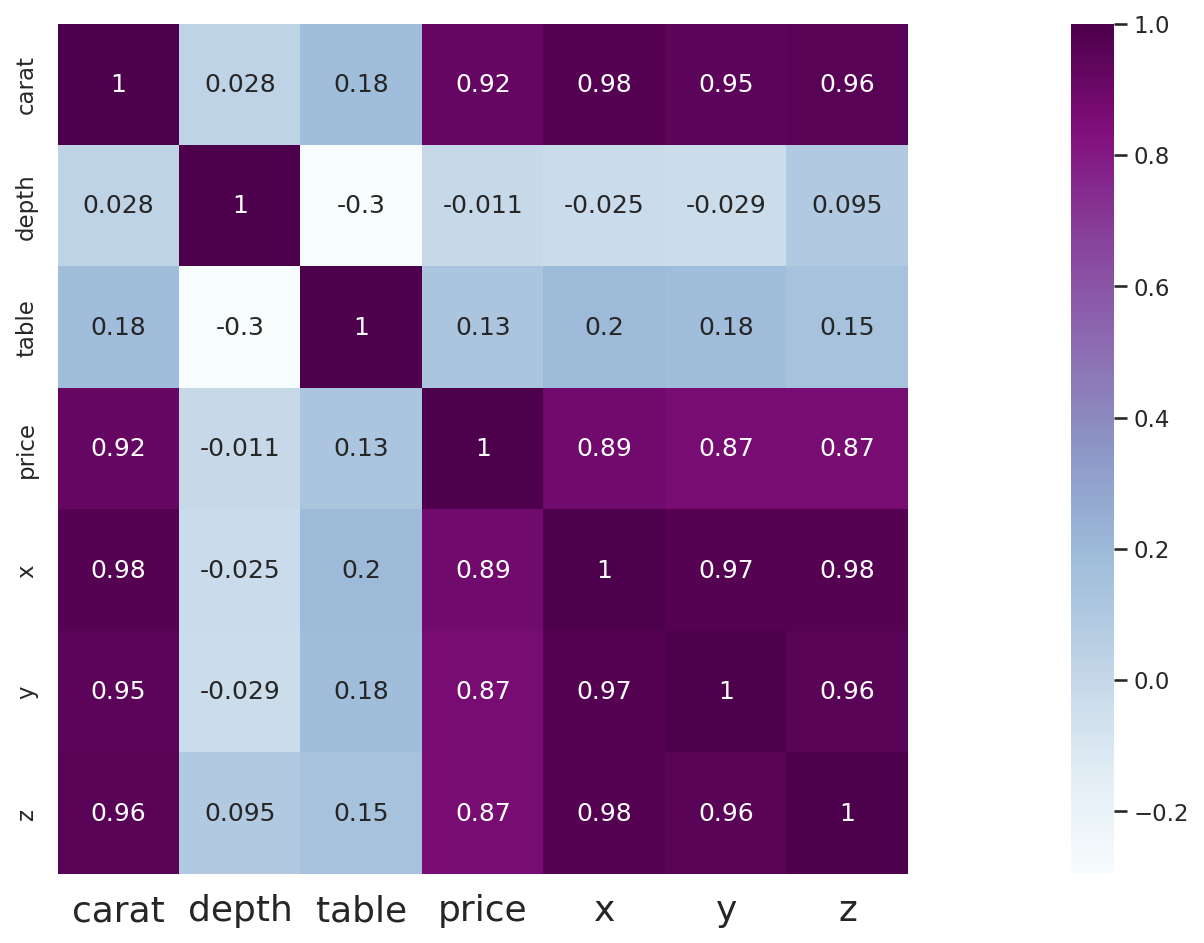

In [10]:
sns.heatmap(data=df.corr(), square=True , annot=True, cbar=True,cmap='BuPu')

### Visualization

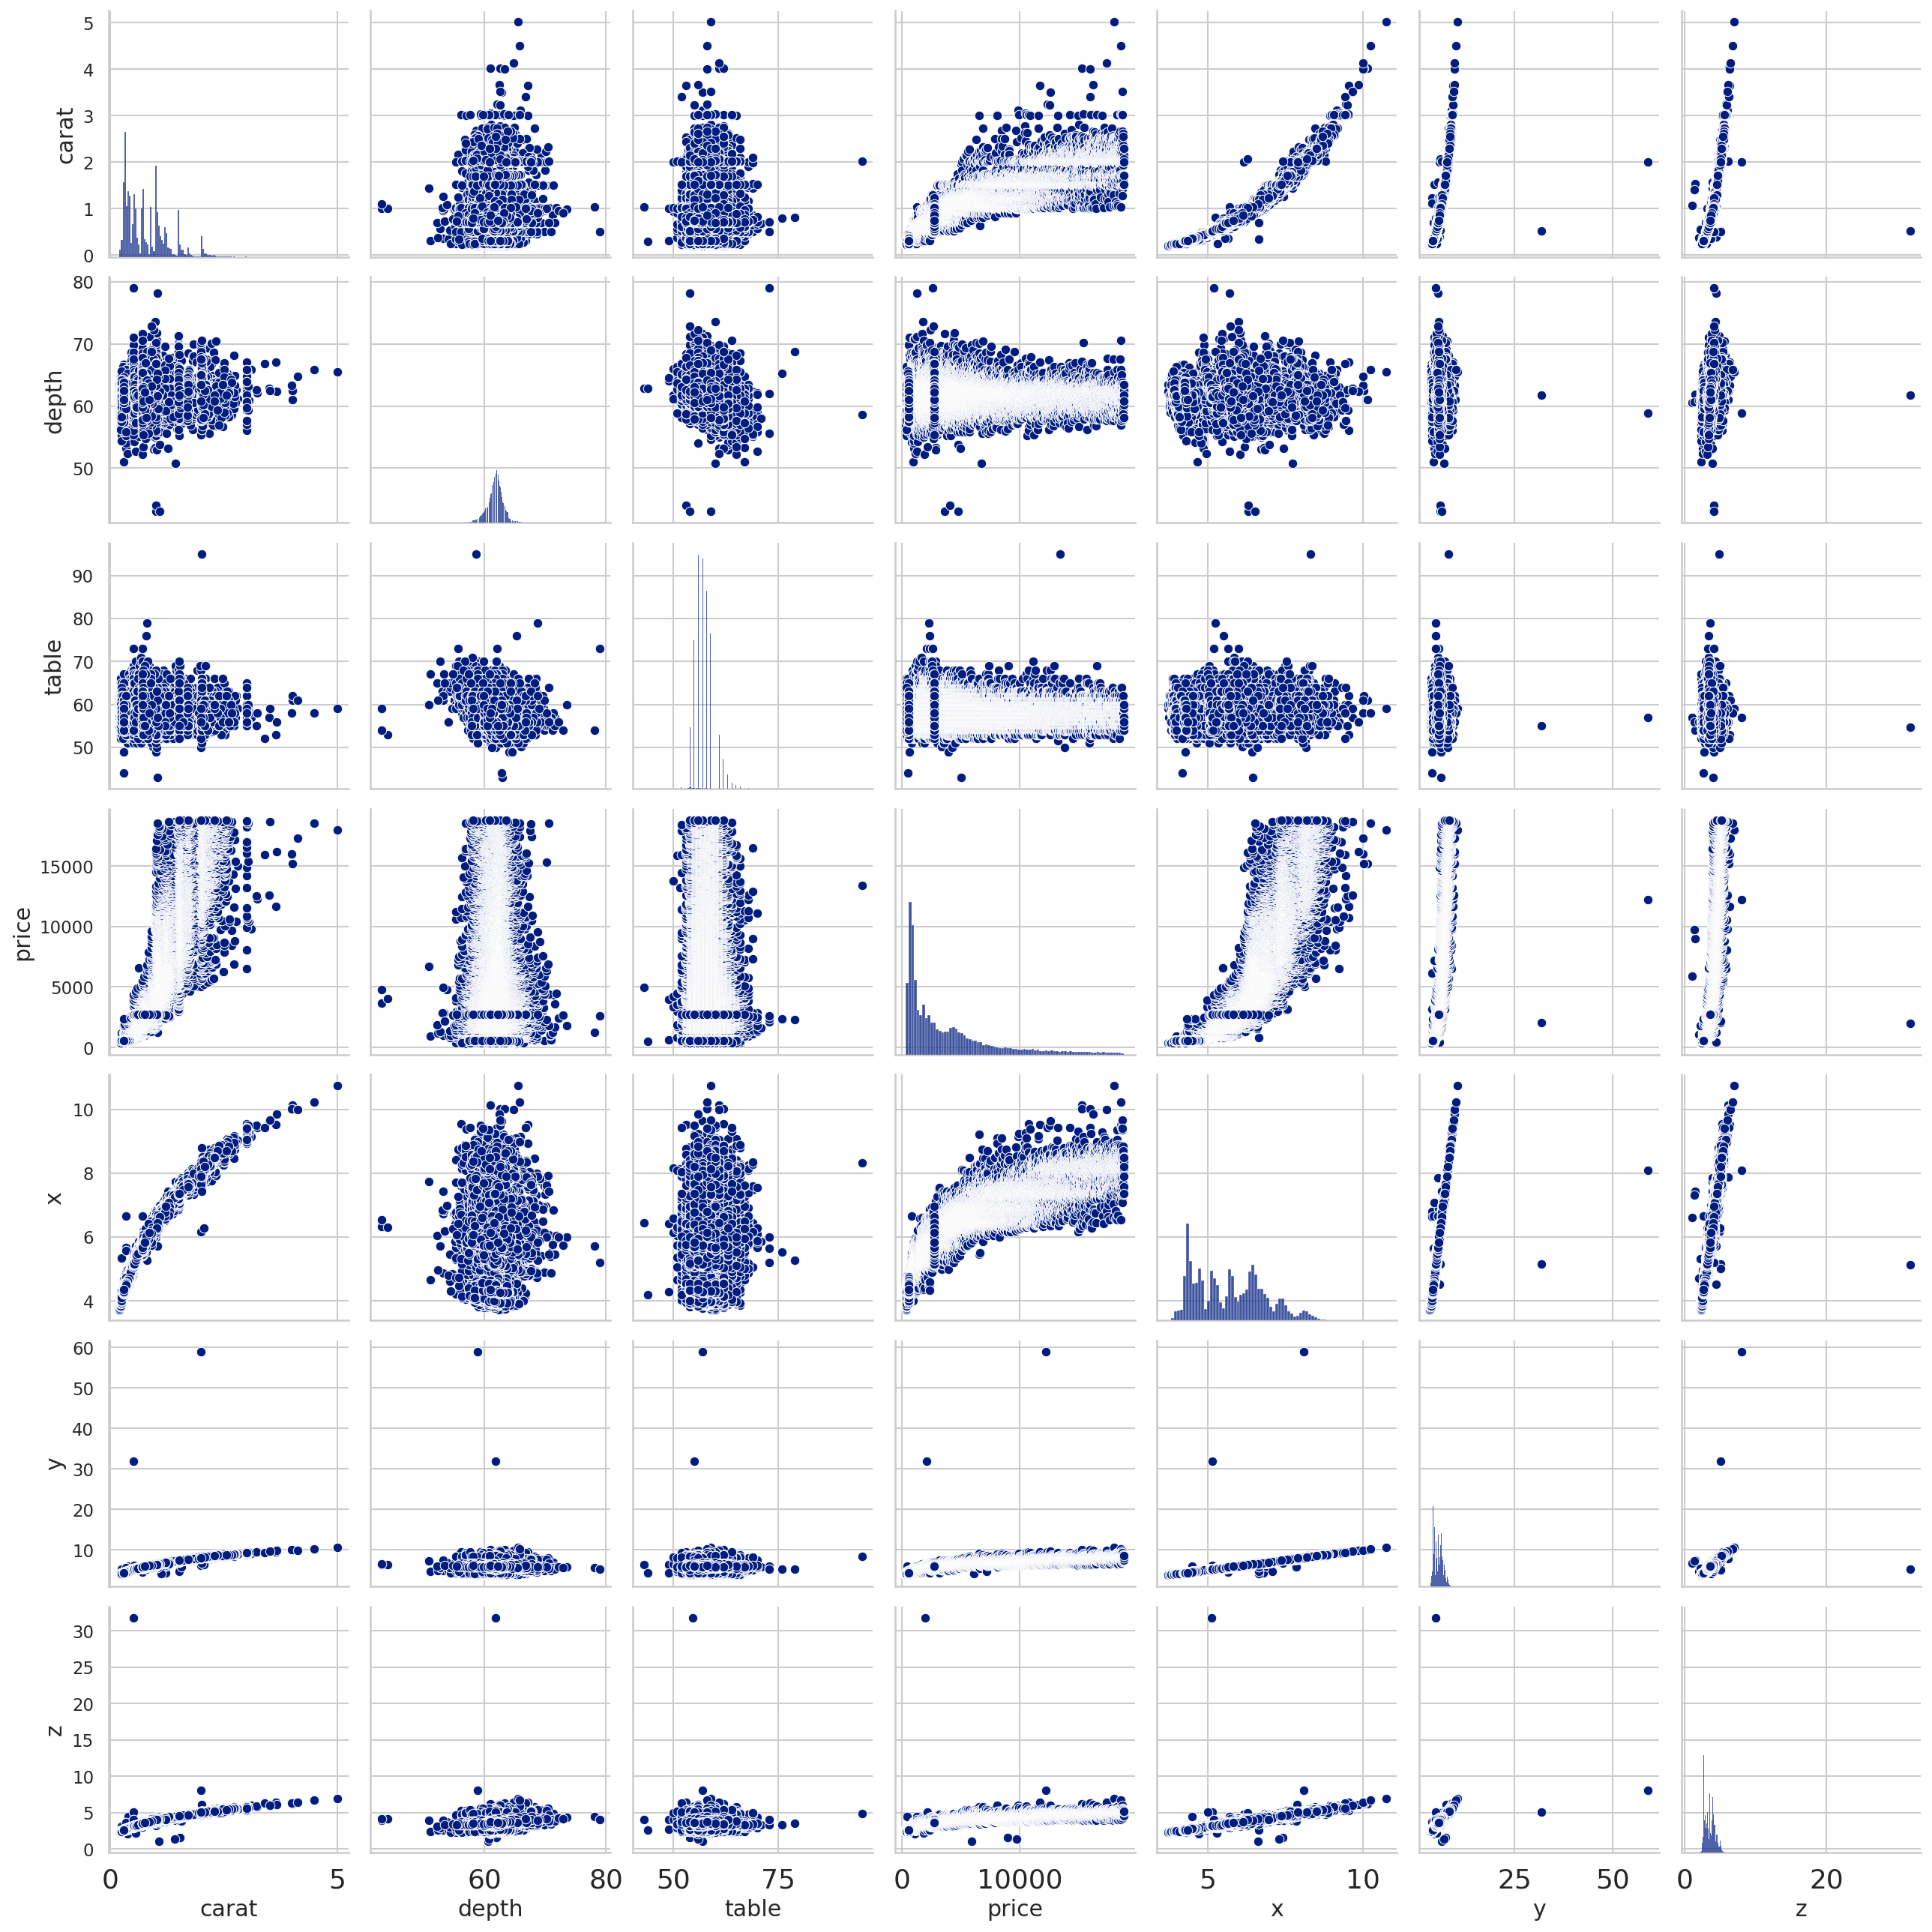

In [11]:
sns.pairplot(df)

  Carat:

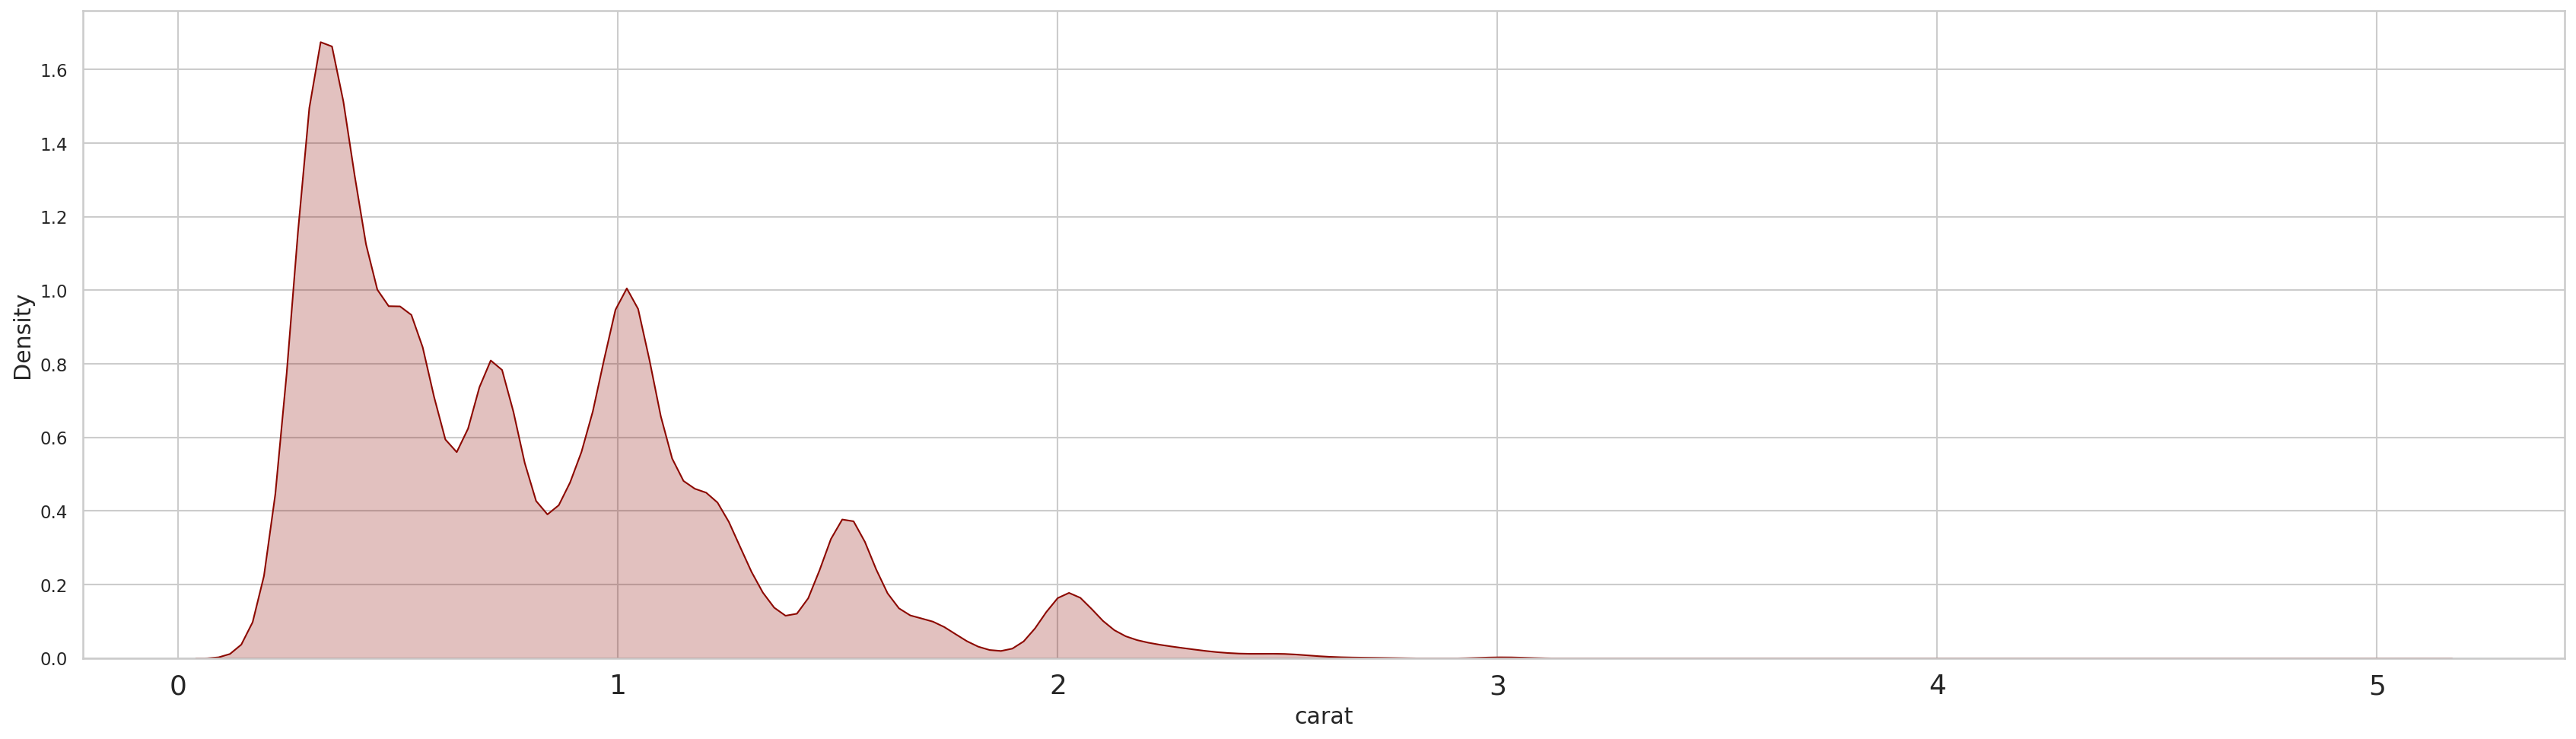

In [12]:
sns.kdeplot(df['carat'], shade=True , color='r')

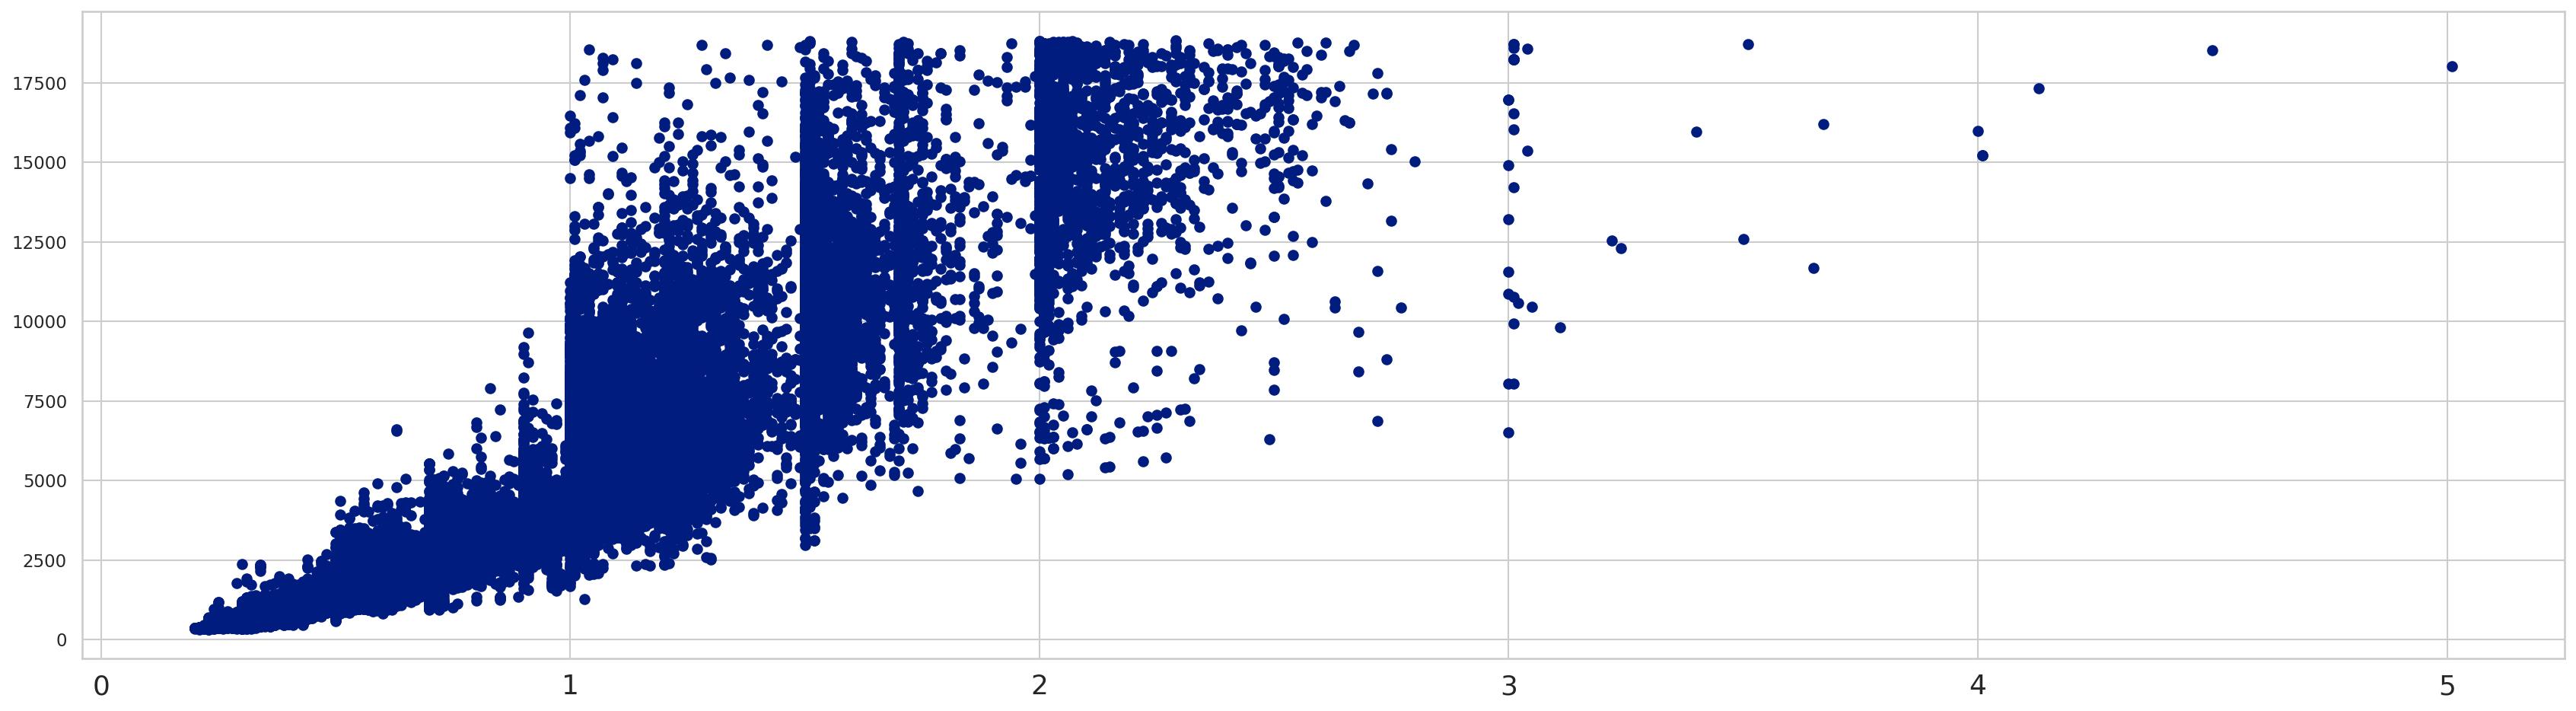

In [13]:
plt.scatter(x=df['carat'], y=df['price'],)

Cut:

Text(0.5, 1.0, 'Cut Value Counts')

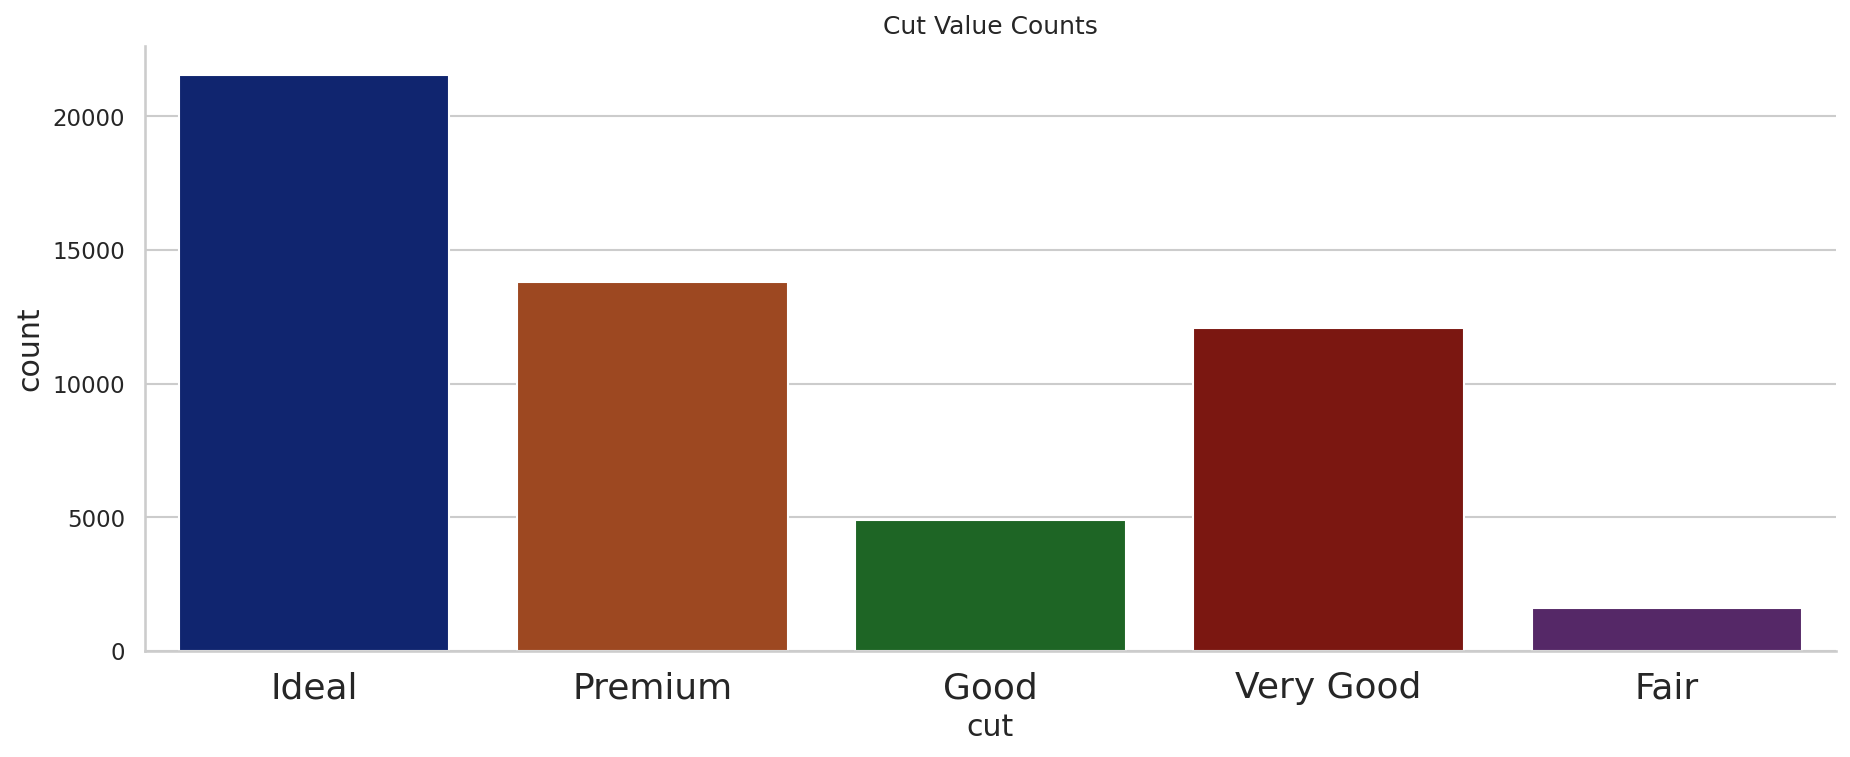

In [14]:
sns.catplot(x='cut', data=df , kind='count',aspect=2.5 )
plt.title('Cut Value Counts')

Text(0.5, 1.0, 'Cut vs Price - Diamonds')

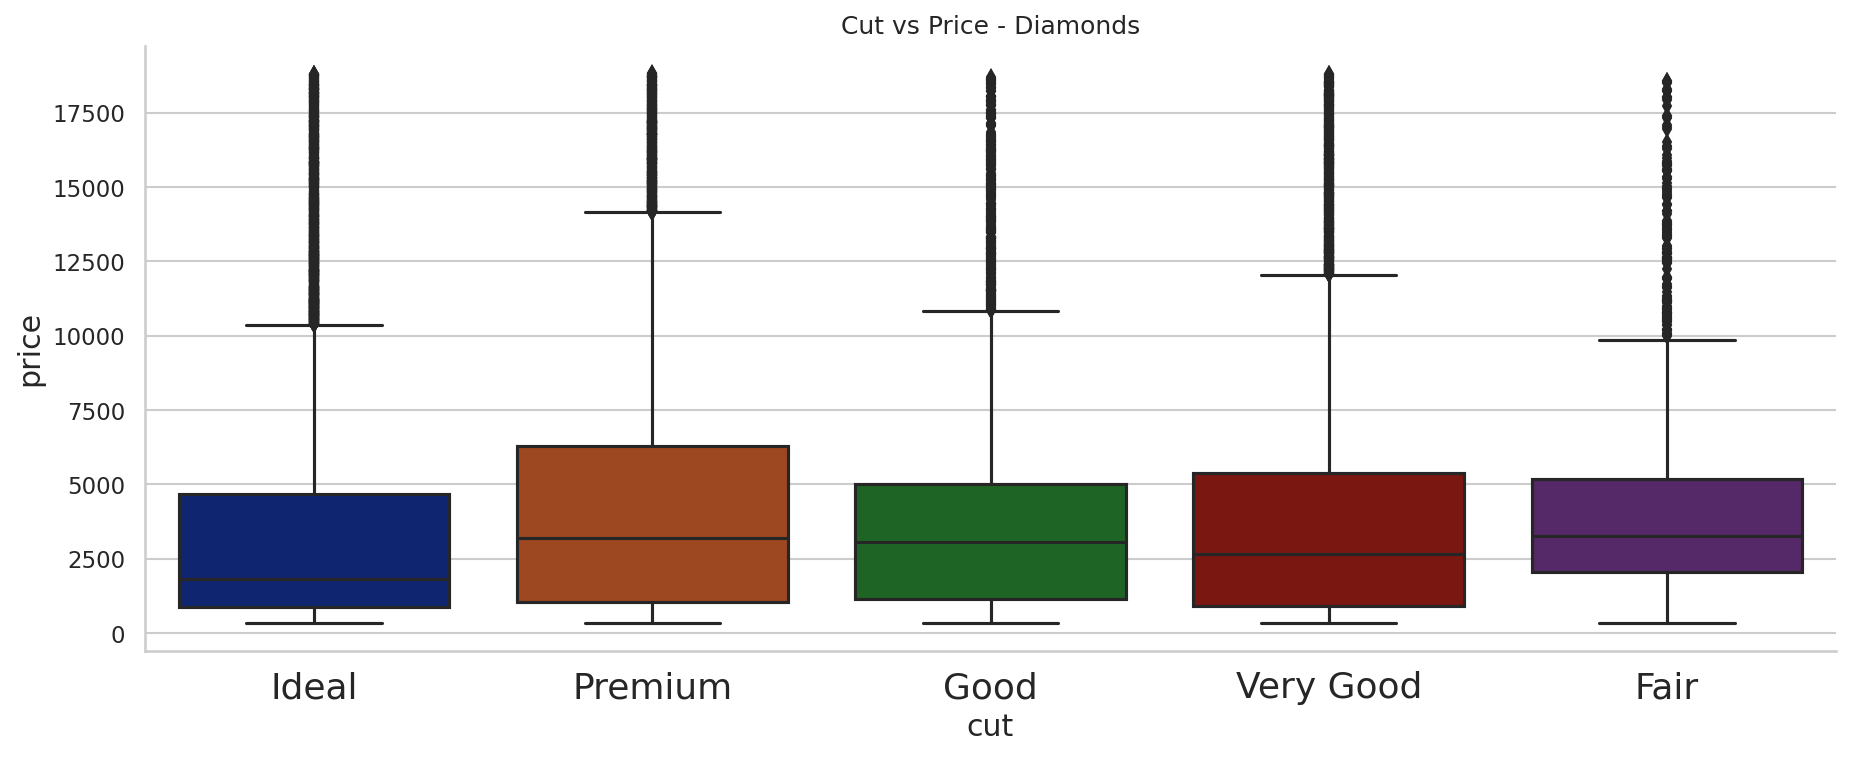

In [15]:
sns.catplot(x='cut',y='price', data=df , kind='box',aspect=2.5 )
plt.title('Cut vs Price - Diamonds')

Color:

Text(0.5, 1.0, 'Color value count')

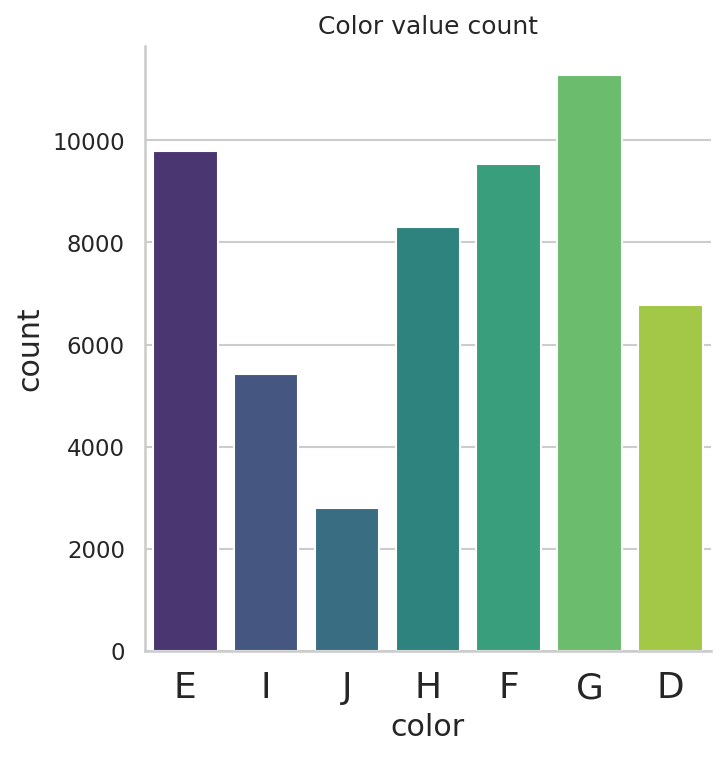

In [16]:
sns.catplot(x='color',data=df, kind='count',palette='viridis')
plt.title('Color value count')

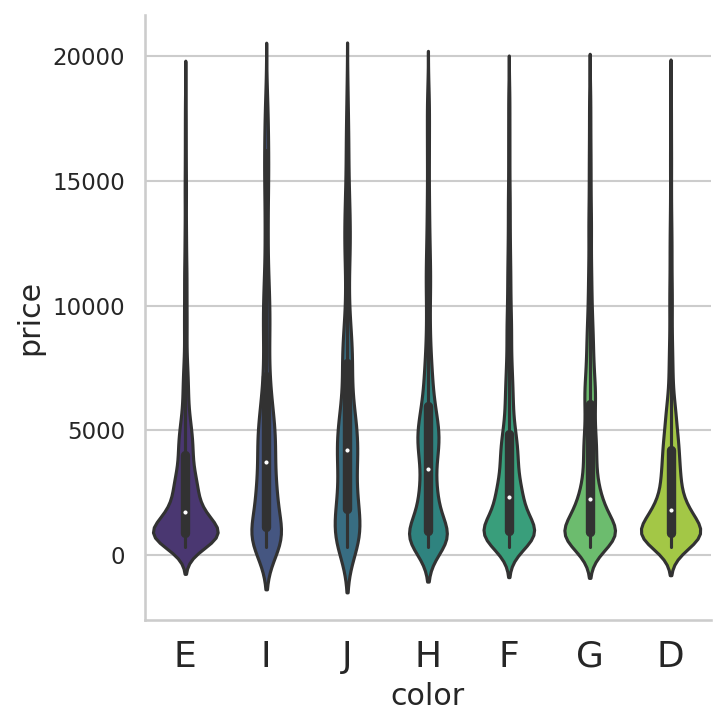

In [17]:
sns.catplot(x='color',y='price',data=df,kind='violin',palette='viridis')

Clarity:


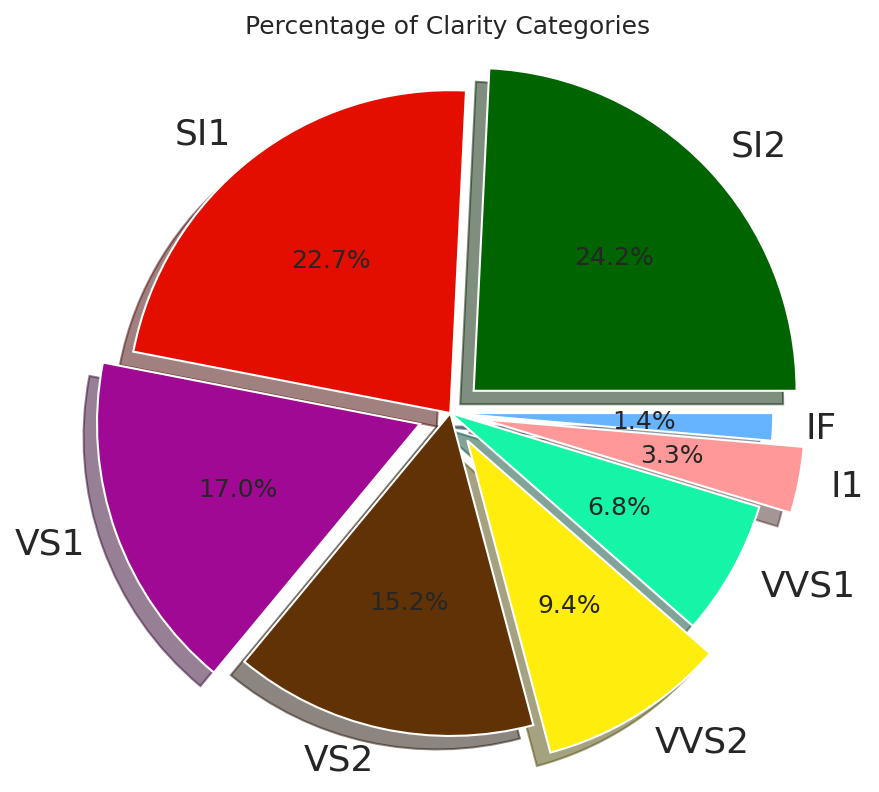

In [18]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

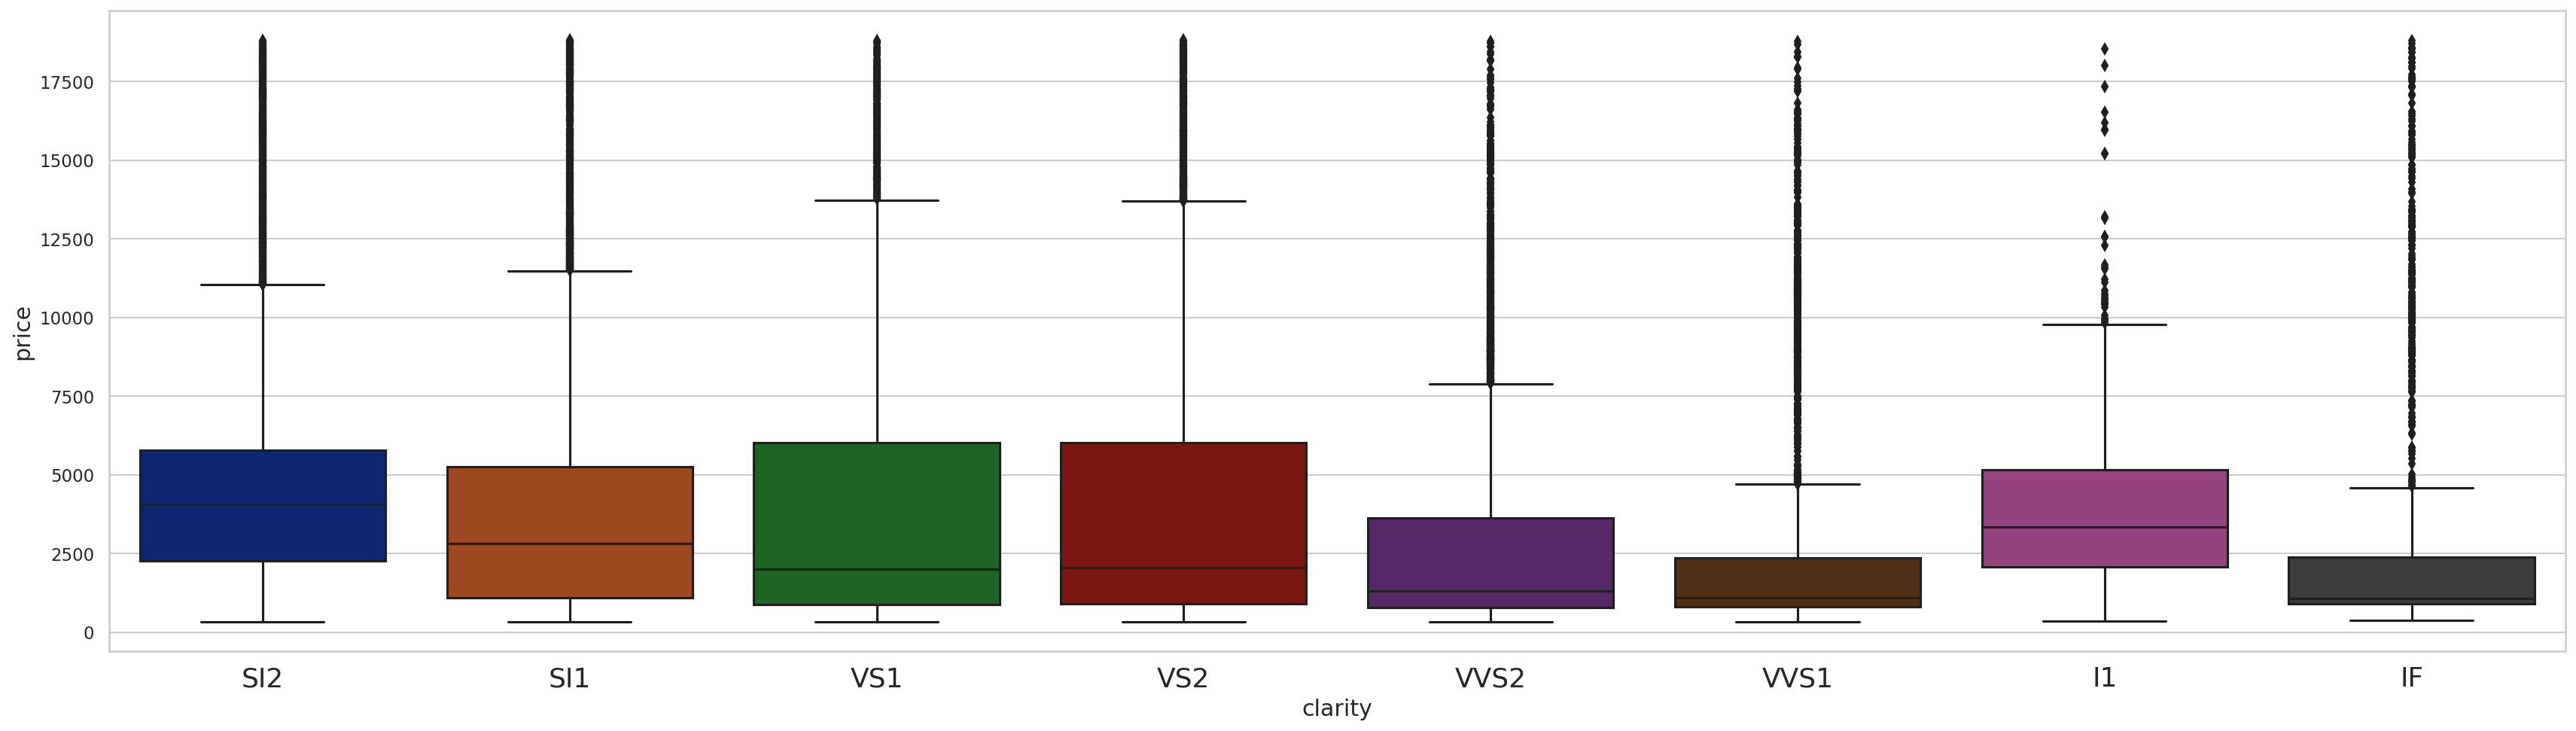

In [19]:
sns.boxplot(x='clarity',y='price',data=df)

Depth:


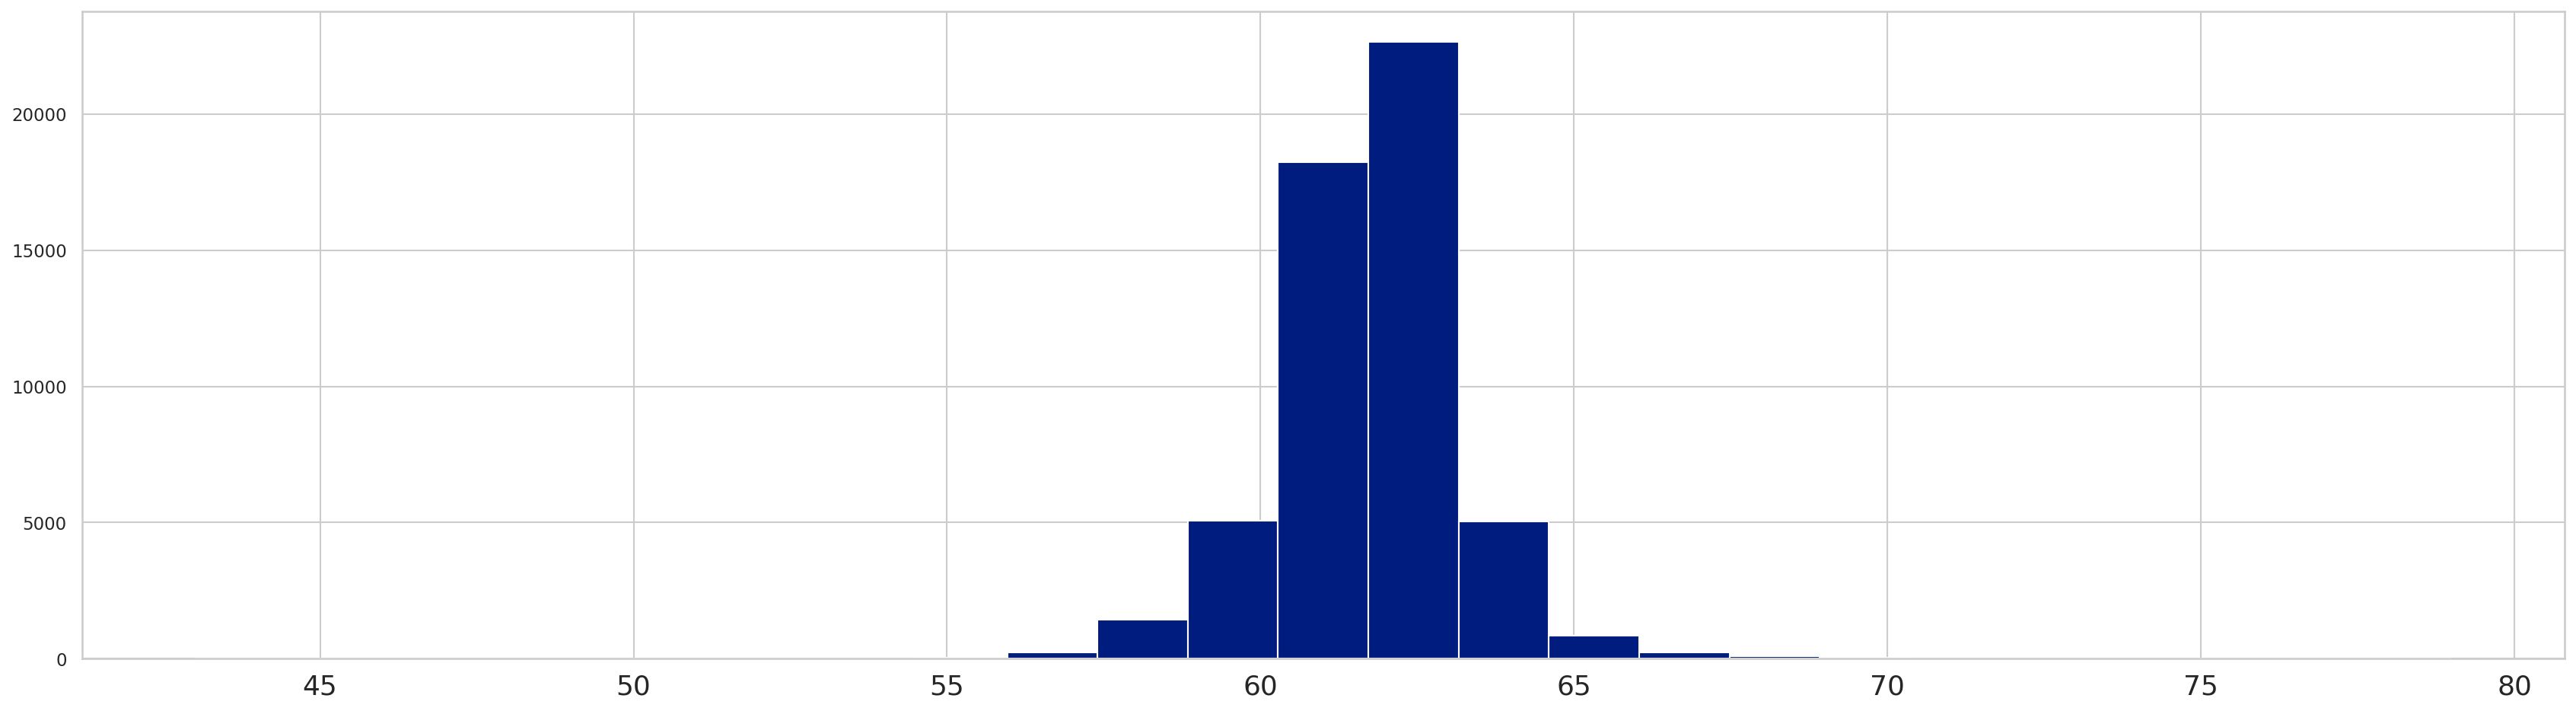

In [20]:
plt.hist('depth',data=df,bins=25);

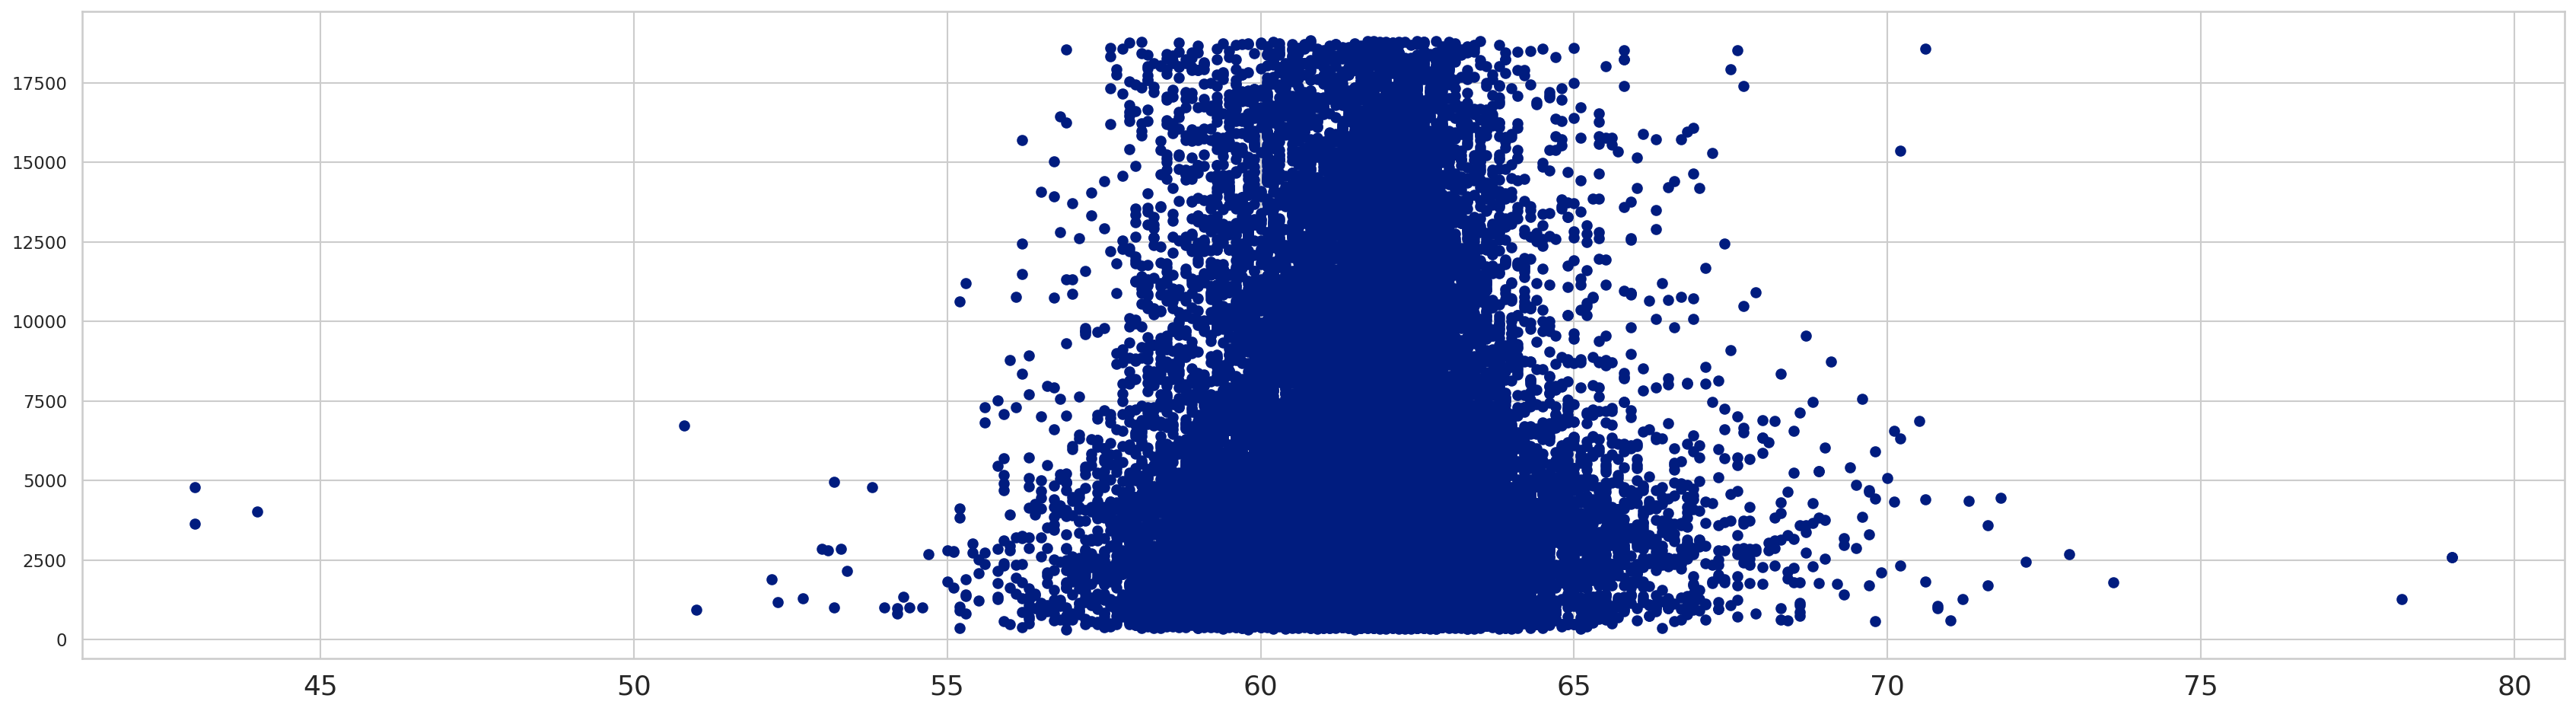

In [21]:
plt.scatter(x='depth',y='price',data=df)

Table:


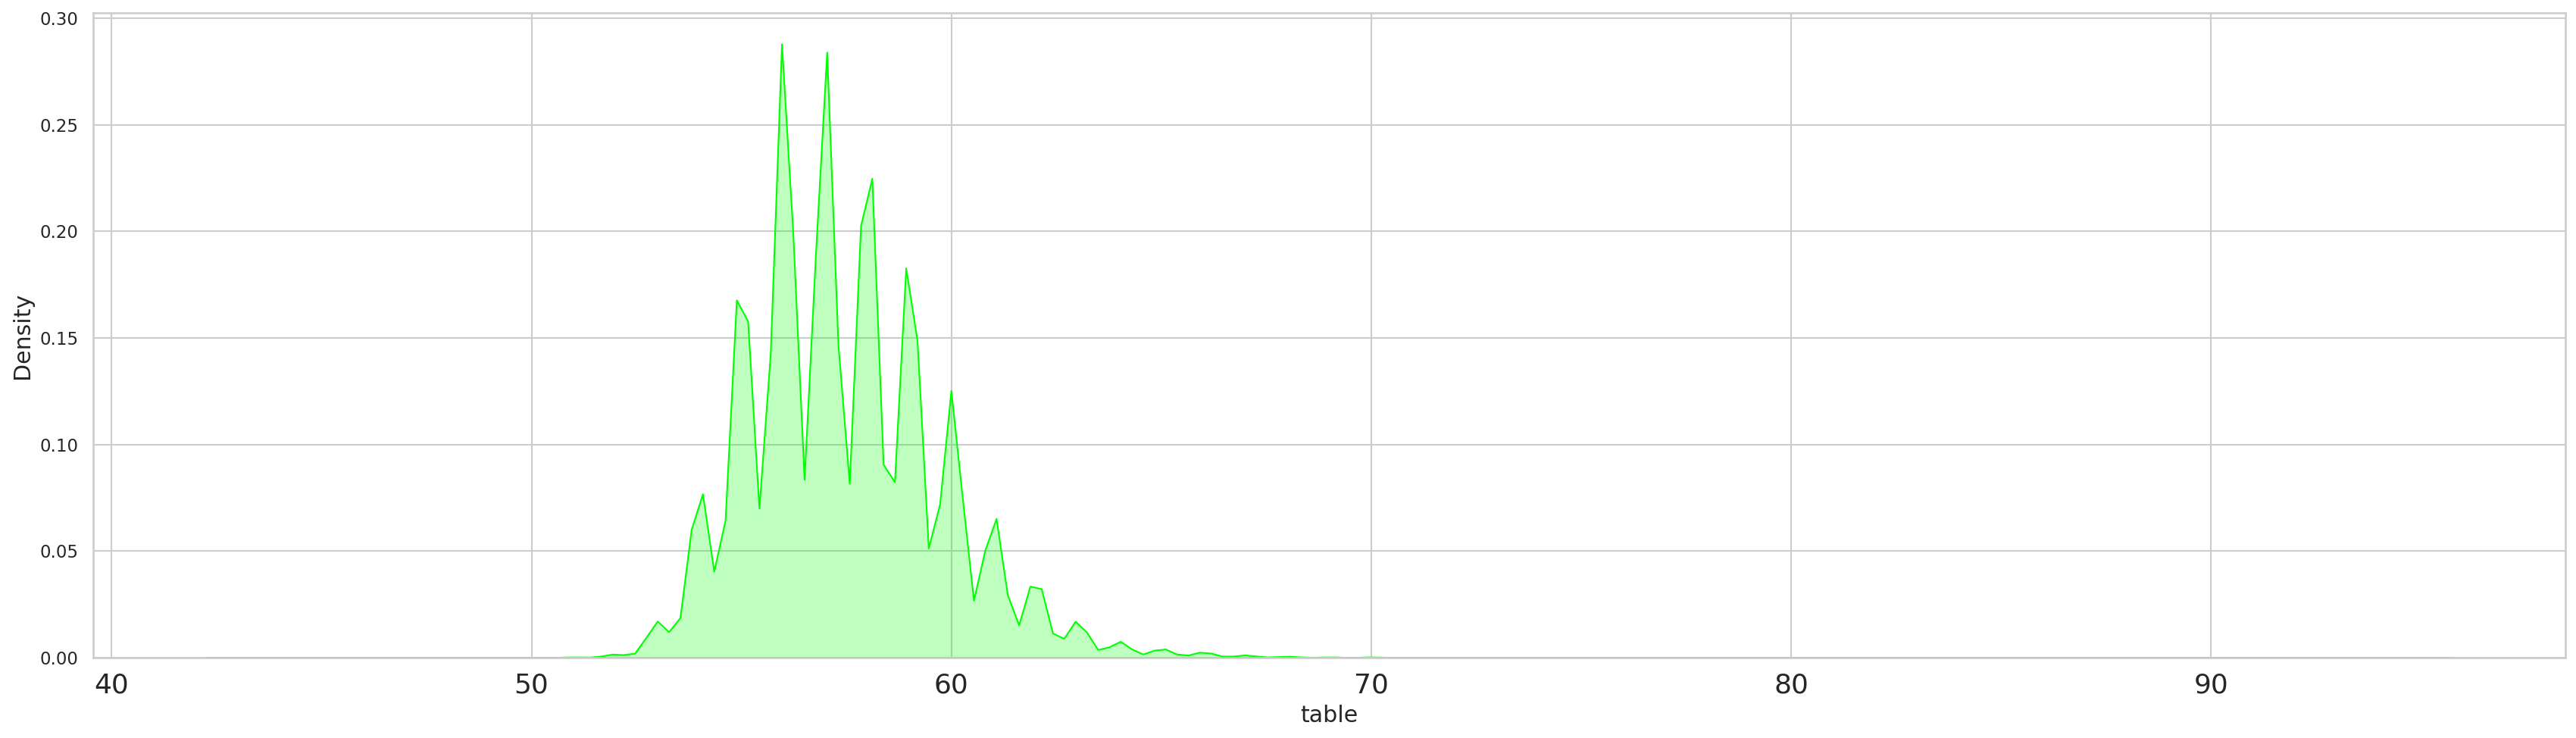

In [22]:
sns.kdeplot(df['table'],shade=True,color='lime')

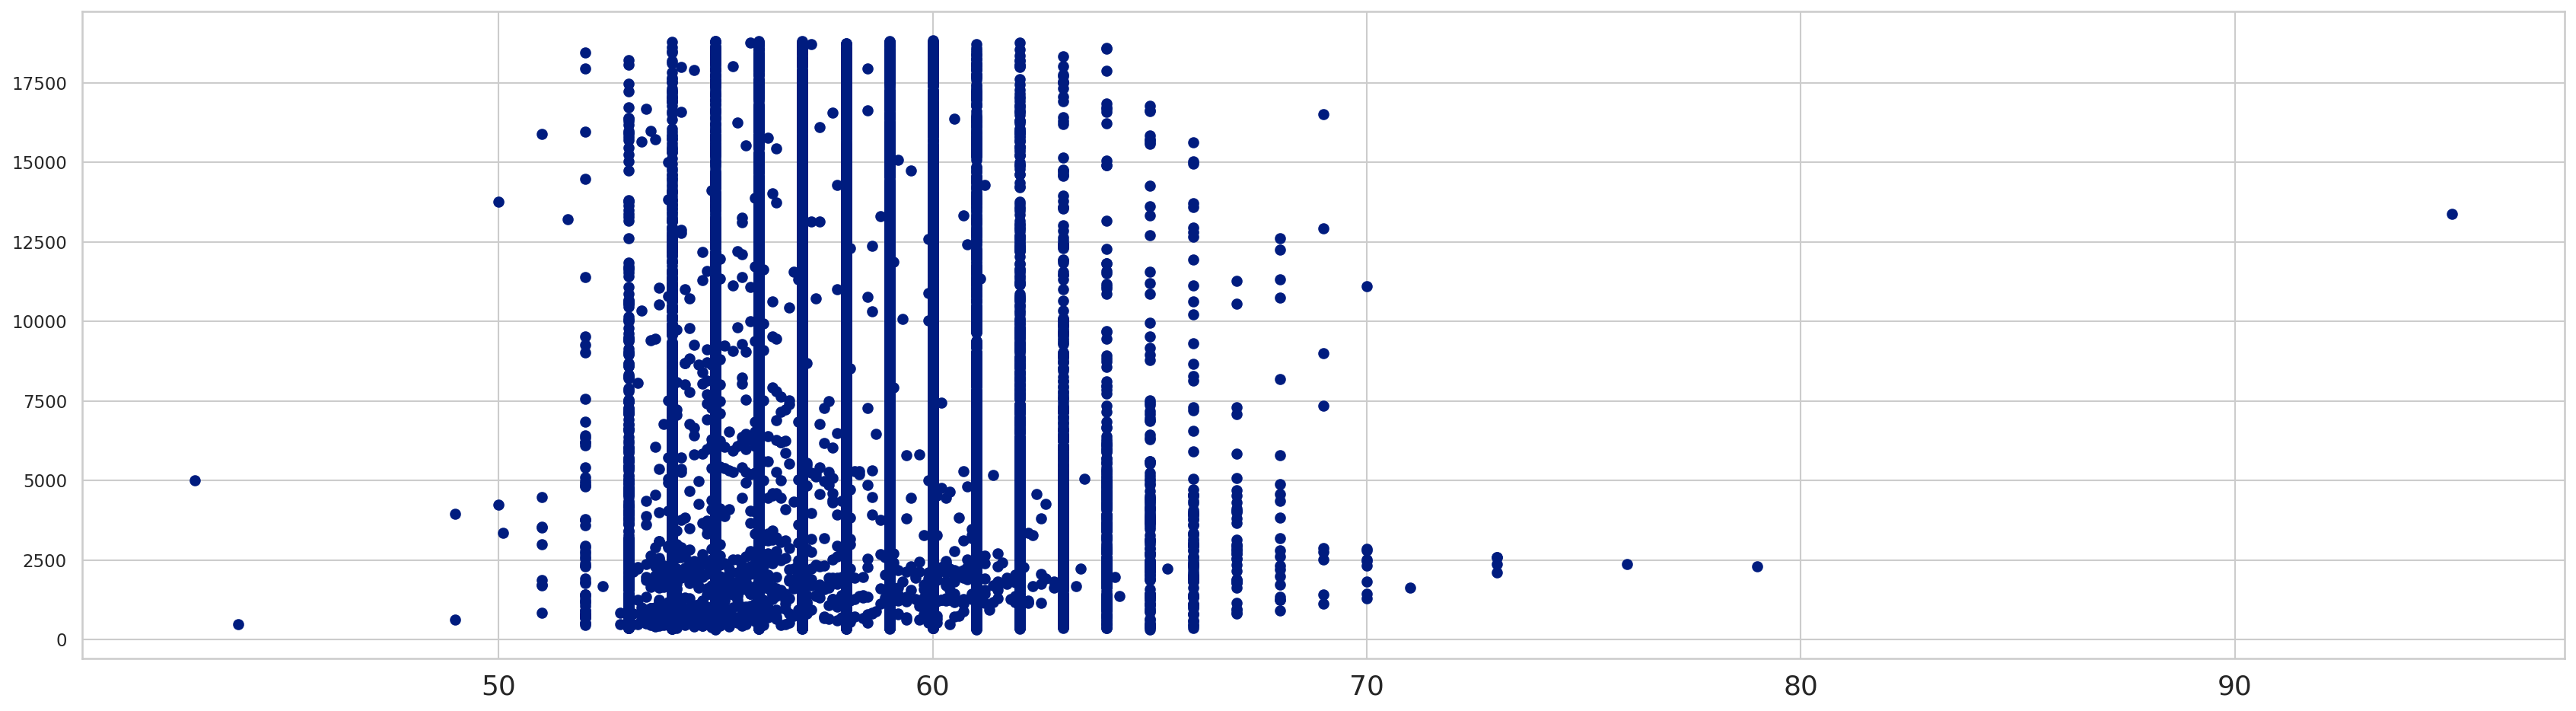

In [23]:
plt.scatter(x='table',y='price',data=df)

Dimensions:


(2.0, 10.0)

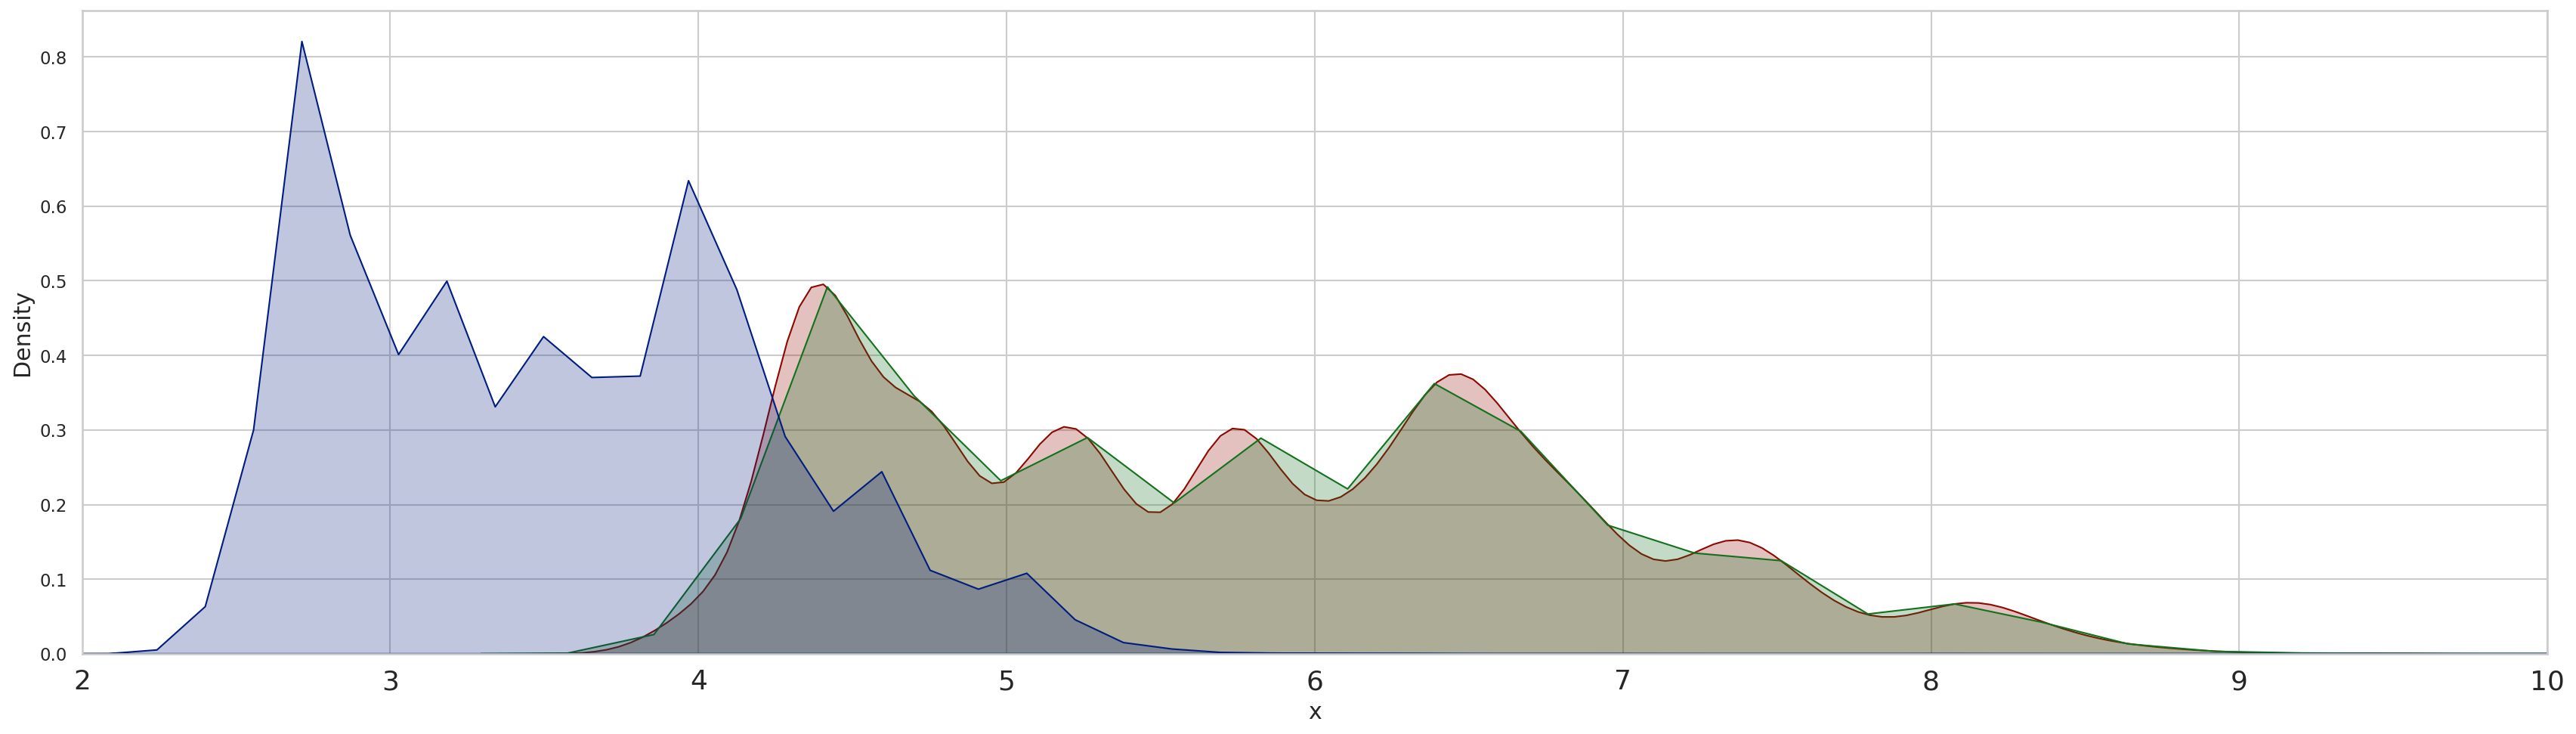

In [24]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

## Feature Engineering:

Creating new feature VOLUME:

In [25]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

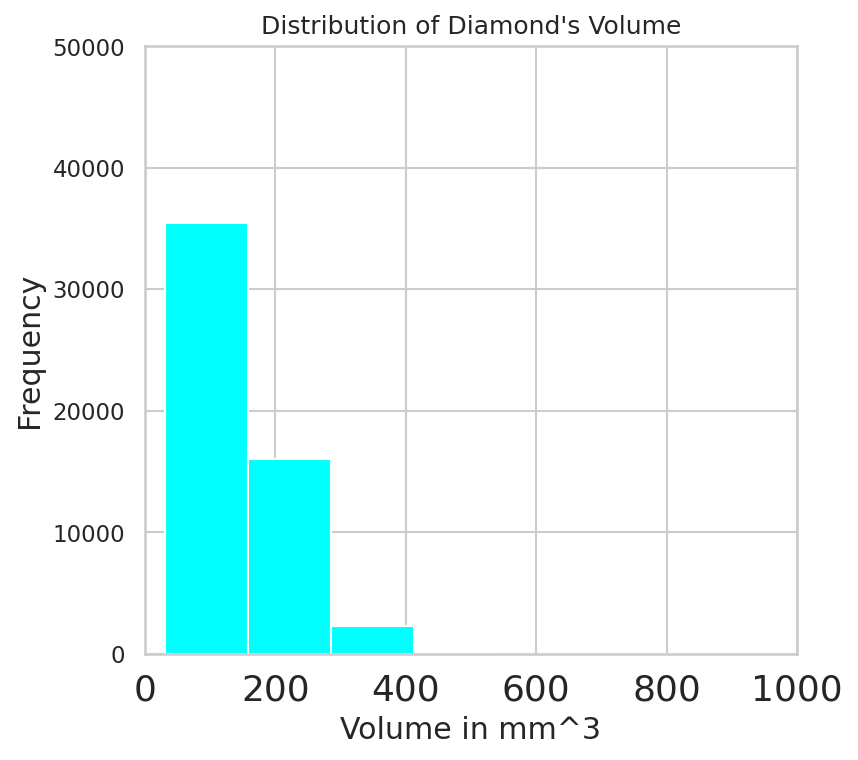

In [26]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='aqua')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

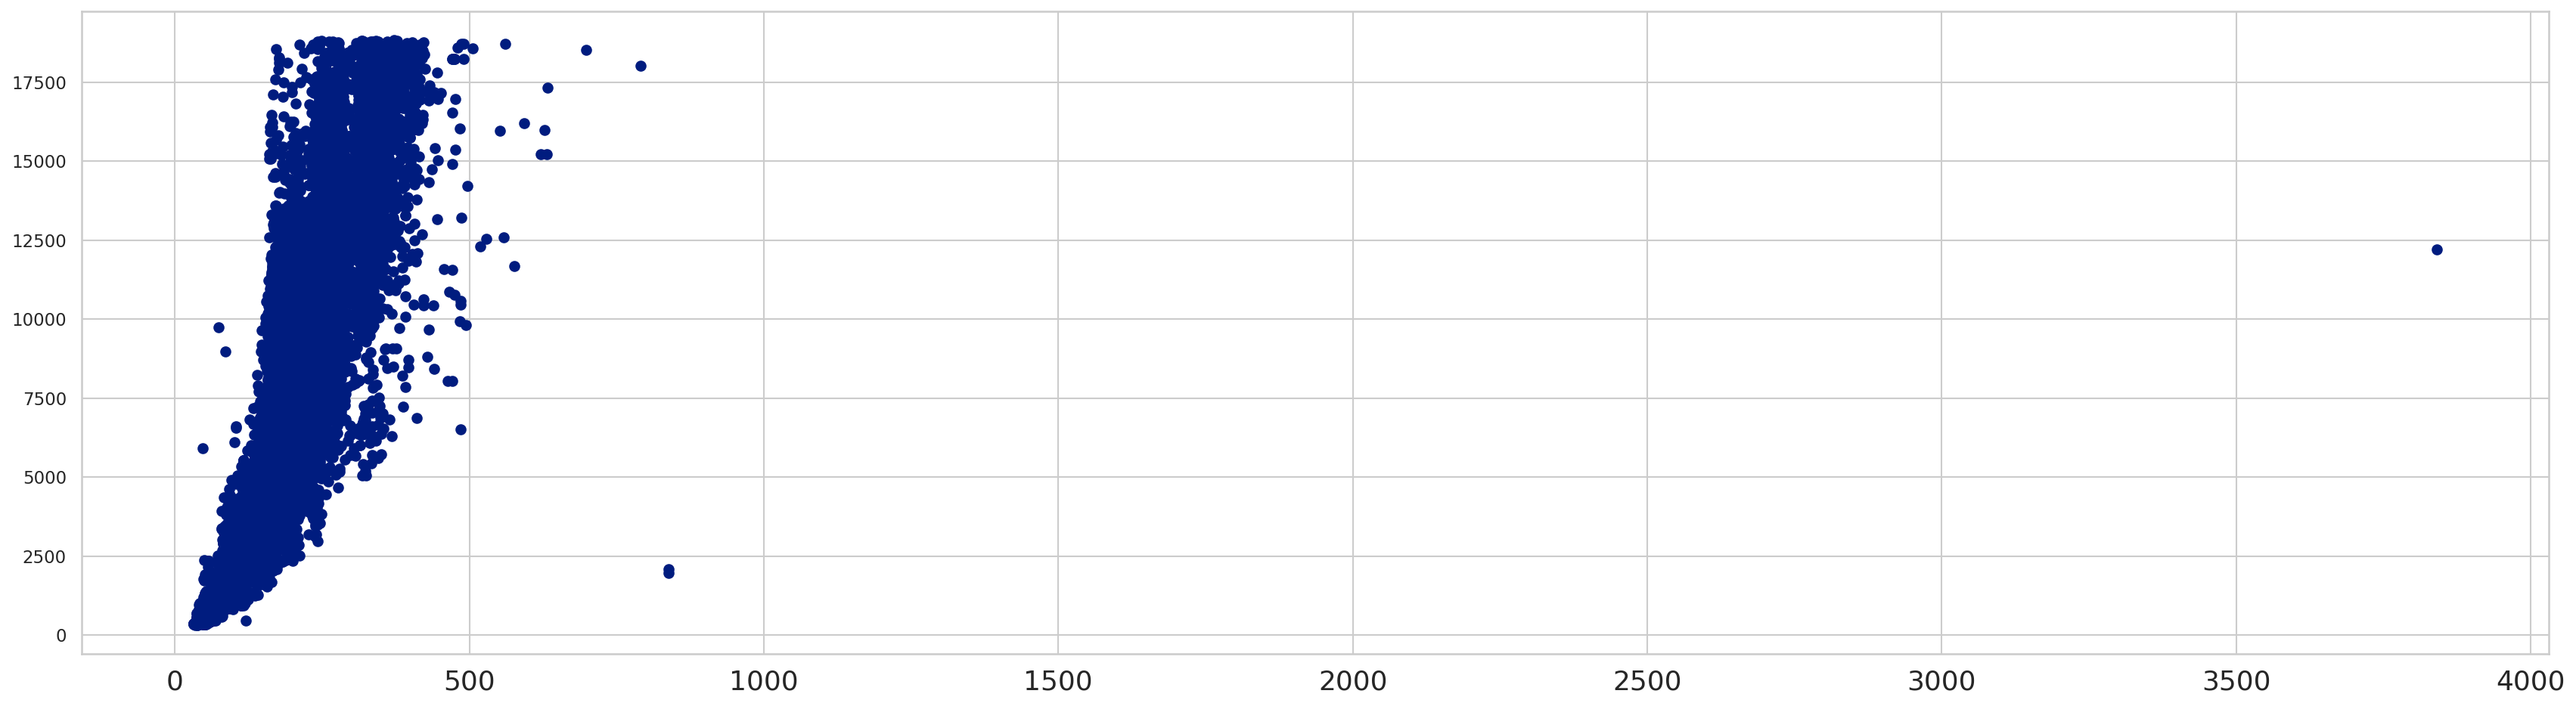

In [27]:
plt.scatter(x='volume',y='price',data=df)

Dropping x,y,z:

In [28]:
df.drop(['x','y','z'],axis=1,inplace=True)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## Feature Encoding:

In [30]:
from sklearn.preprocessing import LabelEncoder

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


## Feature Scaling:


In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling Algos:

In [34]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [35]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_log_error,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

1.  LINEAR REGRESSION:

In [36]:
lr=LinearRegression()
lr.fit(X_train,y_train)
accuracies = cross_val_score(lr,X_train,y_train,cv=5)
y_pred = lr.predict(X_test)
print("Linear Regression")
print('Score : %.4f' % lr.score(X_test,y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print(' ')
print('---------------------------------------------')

R2_Scores.append(r2)

Linear Regression
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE    : 1911398.80 
MAE    : 926.72 
RMSE   : 1382.53 
R2     : 0.88 
 
---------------------------------------------


2.  LASSO REGRESSION

In [37]:
clf_la = Lasso()
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5)
y_pred = clf_la.predict(X_test)
print('')
print('Lasso Regression ')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print(' ')
print('---------------------------------------------')

R2_Scores.append(r2)



Lasso Regression 
Score : 0.8814
[0.87146434 0.88349434 0.87757734 0.87636606 0.88384393]

MSE    : 1911408.72 
MAE    : 926.25 
RMSE   : 1382.54 
R2     : 0.88 
 
---------------------------------------------


3.  ADABOOST REGRESSION

In [38]:
clf_ar = AdaBoostRegressor(n_estimators=500)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5)
y_pred = clf_ar.predict(X_test)
print('')
print('AdaBoost Regression')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print(' ')
print('---------------------------------------------')

R2_Scores.append(r2)


AdaBoost Regression
Score : 0.8964
[0.88220554 0.90547689 0.90294805 0.88602456 0.90298987]

MSE    : 1670605.68 
MAE    : 971.41 
RMSE   : 1292.52 
R2     : 0.90 
 
---------------------------------------------


4.  RIDGE REGRESSION:

In [39]:
clf_rr = Ridge()
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5)
y_pred = clf_rr.predict(X_test)
print('')
print('Ridge Regression')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print(' ')
print('---------------------------------------------')

R2_Scores.append(r2)


Ridge Regression
Score : 0.8814
[0.87094576 0.88350862 0.87757823 0.87635359 0.88384919]

MSE    : 1911385.59 
MAE    : 926.70 
RMSE   : 1382.53 
R2     : 0.88 
 
---------------------------------------------


5.  GRADIENT BOOSTING REGRESSION:

In [40]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('Gradient Boosting Regression')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print(' ')
print('---------------------------------------------')

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            2.38s
         2    12437807.7359            2.37s
         3    11113339.5845            2.30s
         4     9945244.2308            2.12s
         5     8973416.9156            2.02s
         6     8109014.7842            1.94s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


         7     7387120.0500            2.00s
         8     6753937.9878            1.95s
         9     6197182.6819            1.91s
        10     5724689.0901            1.94s
        20     3200362.4597            1.59s
        30     2393542.3170            1.34s
        40     2102586.3335            1.12s
        50     1923964.9187            0.92s
        60     1790574.6006            0.73s
        70     1688380.2826            0.55s
        80     1609829.0076            0.36s
        90     1548089.0039            0.18s
       100     1499127.4566            0.00s
      Iter       Train Loss   Remaining Time 
         1    13994442.1962            1.52s
         2    12429322.7982            1.63s
         3    11112606.0983            1.57s
         4     9944843.0686            1.50s
         5     8977395.9870            1.47s
         6     8111748.5741            1.45s
         7     7395490.7272            1.43s
         8     6765223.5285            1.41s
         

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


        20     3206145.1577            1.22s
        30     2394369.2846            1.03s
        40     2101114.6326            0.88s
        50     1921108.4005            0.73s
        60     1785959.4111            0.59s
        70     1683385.7302            0.46s
        80     1604163.5538            0.32s
        90     1542370.2912            0.17s
       100     1493476.7608            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            2.11s
         2    12472837.6750            2.89s
         3    11137657.6396            3.03s
         4     9974212.6419            3.18s
         5     8994369.5031            2.91s
         6     8133396.8459            2.70s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


         7     7407925.9669            3.76s
         8     6764110.5537            3.86s
         9     6215416.1793            3.73s
        10     5736700.1166            3.59s
        20     3210108.0310            2.59s
        30     2402276.2056            1.99s
        40     2112221.2275            1.73s
        50     1934266.1687            1.48s
        60     1801087.0287            1.21s
        70     1699719.1554            0.89s
        80     1621327.8312            0.58s
        90     1559382.1164            0.30s
       100     1510393.9635            0.00s
      Iter       Train Loss   Remaining Time 
         1    14049930.2441            1.96s
         2    12464124.5936            1.97s
         3    11134339.1520            1.97s
         4     9963572.7604            2.08s
         5     8988544.3119            2.05s
         6     8123782.2835            2.14s
         7     7389901.0249            2.09s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


         8     6746492.7030            2.88s
         9     6199732.4929            2.94s
        10     5719212.8946            3.07s
        20     3190875.3245            3.01s
        30     2381512.2819            2.48s
        40     2090340.2810            2.03s
        50     1911382.9450            1.71s
        60     1777779.4025            1.29s
        70     1675708.2272            0.93s
        80     1597212.1456            0.60s
        90     1535230.7915            0.30s
       100     1486232.9351            0.00s
      Iter       Train Loss   Remaining Time 
         1    13979667.1721            4.49s
         2    12410196.9258            5.87s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


         3    11091464.1339            7.25s
         4     9924417.4531            7.12s
         5     8957051.8356            6.48s
         6     8090860.3178            5.81s
         7     7375141.7273            5.18s
         8     6738456.6139            5.00s
         9     6185985.1013            4.63s
        10     5710402.7142            4.57s
        20     3187460.0845            4.99s
        30     2381173.1454            4.27s
        40     2090773.7598            3.51s
        50     1911732.9770            2.88s
        60     1778590.7605            2.17s
        70     1677144.9024            1.52s
        80     1598482.5518            0.99s
        90     1537106.7445            0.47s
       100     1488486.3117            0.00s
      Iter       Train Loss   Remaining Time 
         1    13978748.2331            6.73s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


         2    12405054.9778            7.15s
         3    11080465.6241            5.53s
         4     9914747.0919            4.63s
         5     8945923.9930            4.66s
         6     8080995.1785            4.60s
         7     7359121.7076            4.31s
         8     6730987.4249            4.21s
         9     6173506.2064            4.20s
        10     5705021.9472            4.28s
        20     3193418.0981            3.38s
        30     2392723.0847            2.80s
        40     2103994.3744            2.14s
        50     1925922.2525            1.87s
        60     1792394.0684            1.40s
        70     1690611.3128            1.16s
        80     1611922.8661            0.86s
        90     1550358.7743            0.42s
       100     1501582.8989            0.00s

Gradient Boosting Regression
Score : 0.9058
[0.90486253 0.90678932 0.90033344 0.90344783 0.90514653]

MSE    : 1518030.06 
MAE    : 720.72 
RMSE   : 1232.08 
R2     : 0.91 
 
--------------

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s finished


6.  RandomForest REGRESSOR

In [41]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('Random Forest')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished



Random Forest
Score : 0.9821
[0.97926316 0.98069705 0.98164268 0.97762569 0.98119665]

MSE    : 288560.11 
MAE    : 271.85 
RMSE   : 537.18 
R2     : 0.98 


hyperparameter tuning:

In [42]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9822
R2     : 0.98 


7.  KNEIGHBORS REGRESSOR

In [43]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished



###### KNeighbours Regression ######
Score : 0.9590
[0.95428659 0.9585707  0.95505953 0.94931709 0.95517563]

MSE    : 660422.13 
MAE    : 425.14 
RMSE   : 812.66 
R2     : 0.96 


hyperparameter tuning:

In [44]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9590
R2     : 0.96 


## Comparison of the R2 Scores:

In [45]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.982208
6,KNeighbours Regression,0.959033
4,GradientBoosting Regression,0.905833
2,AdaBoost Regression,0.896369
3,Ridge Regression,0.881433
0,Linear Regression,0.881432
1,Lasso Regression,0.881431


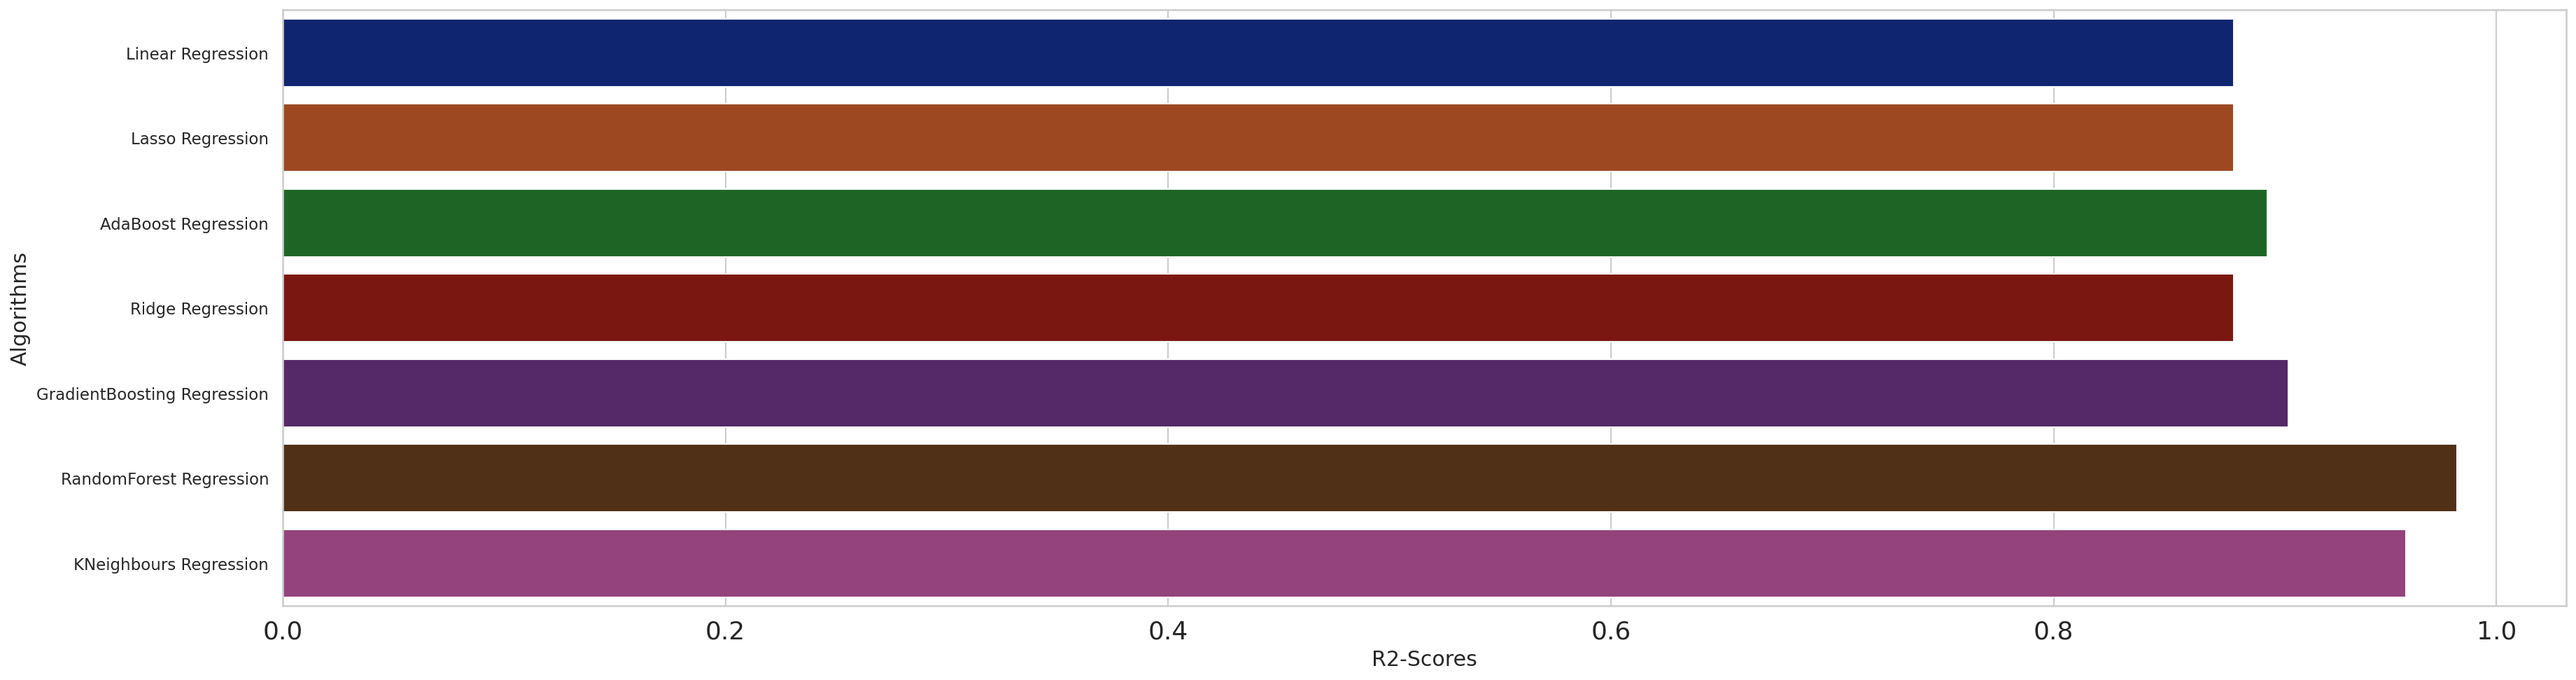

In [46]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

Random Forest Regressor gives us the highest R2-Score [ 98% ] .